In [1]:
cd

/Users/viktorvandervalk


In [2]:
cd Documents/GitHub/DataMiningTechniques/Assignment\ 1

/Users/viktorvandervalk/Documents/GitHub/DataMiningTechniques/Assignment 1


In [3]:
cd summaries_cleaned/

/Users/viktorvandervalk/Documents/GitHub/DataMiningTechniques/Assignment 1/summaries_cleaned


In [108]:
import pandas as pd
import pickle
from datetime import datetime
import re
from matplotlib import pyplot as plt
import numpy as np
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
import sklearn.ensemble as ske
import graphviz 
from sklearn.tree import export_graphviz
from sklearn.preprocessing import StandardScaler, scale
import math
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsRegressor

In [111]:
train2_x[10,:].reshape(-1,1)

array([[ 0.05602882],
       [ 0.33769814],
       [ 0.46169305],
       [-0.38321604],
       [-0.02065555],
       [ 1.05857584],
       [ 0.67552554],
       [-0.42541089],
       [ 1.00693053],
       [-0.76570829]])

In [151]:
pca_data[:-1,1:]

array([[ 8.97284717e-01, -1.74615823e+00,  9.42044634e-01,
         1.14198942e+00,  1.52602986e+00, -4.89408784e-01,
         4.10558161e-01,  1.48257944e-01, -1.34020980e-01,
        -2.97044252e-01, -3.20486929e-01,  3.93811112e+00,
         6.09099231e-01,  1.92929129e+00,  2.45715893e+00,
        -2.24350032e-01,  1.67230553e+00, -1.50755672e-01],
       [ 1.69750560e+00, -7.14511135e-01,  3.27334168e+00,
        -1.15276464e+00,  3.14182618e-01,  6.11760980e-01,
        -5.25032286e-01, -2.87205991e-01, -9.06292525e-01,
        -4.05658151e-01, -3.20486929e-01, -3.35846703e-01,
        -2.26843595e-01, -8.86944005e-01, -3.18275096e-01,
        -2.24350032e-01, -6.41590434e-01, -1.50755672e-01],
       [ 8.97284717e-01,  3.17135958e-01,  1.13908156e+00,
        -1.03030450e+00, -8.97664622e-01, -4.89408784e-01,
        -3.09447995e-01, -1.96542654e-01, -9.05429125e-01,
        -3.20473996e-01, -3.20486929e-01, -3.35846703e-01,
        -3.76313063e-01, -5.67723172e-01, -4.36180631e

(36, 1, 19) (36,) (8, 1, 19) (8,)
Train on 36 samples, validate on 8 samples
Epoch 1/50
 - 1s - loss: 0.4370 - val_loss: 0.7538
Epoch 2/50
 - 0s - loss: 0.4228 - val_loss: 0.7363
Epoch 3/50
 - 0s - loss: 0.4085 - val_loss: 0.7187
Epoch 4/50
 - 0s - loss: 0.3941 - val_loss: 0.7010
Epoch 5/50
 - 0s - loss: 0.3799 - val_loss: 0.6833
Epoch 6/50
 - 0s - loss: 0.3668 - val_loss: 0.6655
Epoch 7/50
 - 0s - loss: 0.3556 - val_loss: 0.6478
Epoch 8/50
 - 0s - loss: 0.3466 - val_loss: 0.6303
Epoch 9/50
 - 0s - loss: 0.3377 - val_loss: 0.6129
Epoch 10/50
 - 0s - loss: 0.3288 - val_loss: 0.5956
Epoch 11/50
 - 0s - loss: 0.3199 - val_loss: 0.5782
Epoch 12/50
 - 0s - loss: 0.3109 - val_loss: 0.5607
Epoch 13/50
 - 0s - loss: 0.3023 - val_loss: 0.5432
Epoch 14/50
 - 0s - loss: 0.2953 - val_loss: 0.5259
Epoch 15/50
 - 0s - loss: 0.2889 - val_loss: 0.5089
Epoch 16/50
 - 0s - loss: 0.2829 - val_loss: 0.4921
Epoch 17/50
 - 0s - loss: 0.2778 - val_loss: 0.4758
Epoch 18/50
 - 0s - loss: 0.2733 - val_loss: 0.4

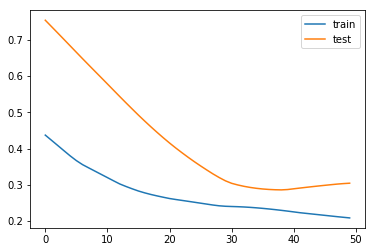

Test RMSE: 0.722


In [158]:
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
 
data = pd.read_csv('patient_01_summary.csv')
    
# Principal Components Analysis
#pca = PCA(n_components=10)

scaler = MinMaxScaler(feature_range=(0, 1))
pca_data = scaler.fit_transform(data.iloc[:,1:].values)


x_p = pca_data[:-1,:]
y_p = pca_data[1:,0]

#x_pca = pca.fit_transform(pca_data)

seg = [0.7, 0.1, 0.2]
t = len(data)

splits = [math.floor(seg[0]*t), math.floor((seg[0]+seg[1])*t)]
train_X, train_y = x_p[:splits[1]], y_p[:splits[1]]   # includes validation data

test_X, test_y = x_p[splits[1]:], y_p[splits[1]:]

# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)
 
# design network
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
# fit network

history = model.fit(train_X, train_y, epochs=50, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()
 
# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
# invert scaling for forecast
inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))


print('Test RMSE: %.3f' % rmse)

In [156]:
print(inv_yhat)
print(inv_y)

[7.30262768 6.98668301 7.06677544 7.13639605 6.93785167 7.68542278
 7.08399677 7.11043549]
[7.5 7.6 7.  7.8 8.  7.6 8.  8. ]


In [132]:

msesKNN = []
msesRF = []

for i in [1,2,3,5,6,7,8,9,12,13,14,15,16,17,19,20,23,24,25,26,27,28,29,30,31,32,33]:

#for i in [1,2,3]:

    if i < 10:
        data = pd.read_csv('patient_0%s_summary.csv'%i)
        
    else:
        data = pd.read_csv('patient_%s_summary.csv'%i)

    x_p = data.iloc[:-1,1:]
    y_p = data.iloc[1:,1]
    
    # Principal Components Analysis
    pca = PCA(n_components=10)
    pca_data = scale(x_p.values, axis=0)
    x_pca = pca.fit_transform(pca_data)
    
    #x_pca = pca_data
    
    # Train, test, validation set
    seg = [0.7, 0.1, 0.2]
    t = len(data)
    splits = [math.floor(seg[0]*t), math.floor((seg[0]+seg[1])*t)]
    
    train_x, train_y = x_pca[:splits[0]], y_p[:splits[0]]
    train2_x, train2_y = x_pca[:splits[1]], y_p[:splits[1]]   # includes validation data
    validate_x, validate_y = x_pca[splits[0]:splits[1]], y_p[splits[0]:splits[1]]
    test_x, test_y = x_pca[splits[1]:], y_p[splits[1]:]
    
    squared_errorKNN = []
    squared_errorRF = []
    
    for t in range(len(train_x), len(train2_x)):
        
        # KNN
        
        knn = KNeighborsRegressor(n_neighbors = 9)
        knn.fit(train2_x[:t,:], train2_y[:t])
        yhatKNN = knn.predict(train2_x[t,:].reshape(1,-1))
        
        
        clf = ske.RandomForestRegressor(n_estimators=100, max_features=10)
        clf = clf.fit(train2_x[:t,:], train2_y[:t])
        yhatRF = clf.predict(train2_x[t,:].reshape(1,-1))
    
        obs = train2_y[t]
        print('Predicted KNN: {:%s}, Predicted RFR: {:%s}, Obeserved: {:%s}' %(yhatKNN, yhatRF, obs))
        squared_errorKNN.append((obs - yhatKNN)**2)
        squared_errorRF.append((obs - yhatRF)**2)
                
    mseKNN = np.mean(squared_errorKNN)
    mseRF = np.mean(squared_errorRF)
    
    print('\nMSE KNN: {}'.format(mseKNN))
    msesKNN.append(mseKNN)
    
    print('\nMSE RF: {}'.format(mseRF))
    msesRF.append(mseRF)

print('\n\nAvg. MSE KNN (all patients): {}'.format(np.mean(msesKNN)))
print('\n\nAvg. MSE RF (all patients): {}'.format(np.mean(msesRF)))
       
        

Predicted KNN: {:[7.27777778]}, Predicted RFR: {:[6.9245]}, Obeserved: {:7.6}
Predicted KNN: {:[7.09444444]}, Predicted RFR: {:[7.1015]}, Obeserved: {:7.4}
Predicted KNN: {:[7.18333333]}, Predicted RFR: {:[7.428]}, Obeserved: {:7.6}
Predicted KNN: {:[7.35]}, Predicted RFR: {:[6.99]}, Obeserved: {:7.6}
Predicted KNN: {:[7.22777778]}, Predicted RFR: {:[7.231]}, Obeserved: {:7.2}

MSE KNN: 0.0868148148148147

MSE RF: 0.18960950000000093
Predicted KNN: {:[7.10555556]}, Predicted RFR: {:[6.736]}, Obeserved: {:7.2}
Predicted KNN: {:[6.73888889]}, Predicted RFR: {:[6.5675]}, Obeserved: {:8.0}
Predicted KNN: {:[7.32777778]}, Predicted RFR: {:[6.9925]}, Obeserved: {:7.25}
Predicted KNN: {:[7.2462963]}, Predicted RFR: {:[6.89983333]}, Obeserved: {:6.666666666666668}

MSE KNN: 0.48533521947873726

MSE RF: 0.5970062986111131
Predicted KNN: {:[7.62962963]}, Predicted RFR: {:[7.63283333]}, Obeserved: {:7.6}
Predicted KNN: {:[7.4962963]}, Predicted RFR: {:[7.39683333]}, Obeserved: {:7.0}
Predicted KN

Predicted KNN: {:[7.73888889]}, Predicted RFR: {:[7.2905]}, Obeserved: {:7.6}
Predicted KNN: {:[7.86666667]}, Predicted RFR: {:[7.673]}, Obeserved: {:7.8}

MSE KNN: 0.011867283950617447

MSE RF: 0.05595962499999882
Predicted KNN: {:[7.66111111]}, Predicted RFR: {:[7.7285]}, Obeserved: {:7.8}
Predicted KNN: {:[7.58518519]}, Predicted RFR: {:[7.74583333]}, Obeserved: {:8.0}
Predicted KNN: {:[7.70740741]}, Predicted RFR: {:[7.87233333]}, Obeserved: {:7.6}
Predicted KNN: {:[7.6462963]}, Predicted RFR: {:[7.94183333]}, Obeserved: {:8.2}
Predicted KNN: {:[7.75740741]}, Predicted RFR: {:[7.84633333]}, Obeserved: {:7.5}

MSE KNN: 0.11514883401920435

MSE RF: 0.06609503888888899
Predicted KNN: {:[6.95555556]}, Predicted RFR: {:[7.037]}, Obeserved: {:7.0}
Predicted KNN: {:[7.06666667]}, Predicted RFR: {:[7.032]}, Obeserved: {:7.0}
Predicted KNN: {:[7.03888889]}, Predicted RFR: {:[7.167]}, Obeserved: {:7.4}
Predicted KNN: {:[6.88888889]}, Predicted RFR: {:[7.1115]}, Obeserved: {:6.8}

MSE KNN: 0.

In [64]:
sum(data.iloc[5,8:20].values)

7068.053000000001

In [86]:
p_data = data['mood']
p_data.rename(columns={'mood': 'next_mood'}, inplace=True)

p_data.rename(columns={p_data.columns[0]: 'next_mood'}, inplace=True)
p_data['next_mood'] = p_data['next_mood'].shift(-1)
p_data = p_data[:-1]   # remove final NaN caused by shifting
            
seg = [0.7, 0.1, 0.2]
t = len(data)
splits = [math.floor(seg[0]*t), math.floor((seg[0]+seg[1])*t)]

train = p_data[:splits[0]]
train2 = p_data[:splits[1]]   # includes validation data
validate = p_data[splits[0]:splits[1]]
test = p_data[splits[1]:]

train_x, train_y = train.iloc[:, 1:], train['next_mood']
train2_x, train2_y = train2.iloc[:, 1:], train2['next_mood']
validate_x, validate_y = validate.iloc[:, 1:], validate['next_mood']
test_x, test_y = test.iloc[:, 1:], test['next_mood']

for t in range(len(train), len(train2)):
    
    knn = KNeighborsClassifier(n_neighbors = 3)
    knn2.fit(train_x, train_y)
   
    knn2.predict(x_test_pca)
                #print(p_data.iloc[t-1:t, 1:])
                model = VAR(train2.iloc[:t, :])
                results = model.fit(4)
                yhat = results.forecast(train2.iloc[:t, :].values, 1)[0][0]
                obs = p_data['next_mood'][t]
        
                print('Predicted: {:.2f}, Observed: {:.2f}'.format(yhat, obs))
                squared_error.append((obs - yhat)**2)
            
            mse = np.mean(squared_error)
            print('\nMSE: {}'.format(mse))
            mses.append(mse)


array([[ 0.,  1.,  1.,  1.,  1.],
       [ 0., -1., -1., -1., -1.]])

[ 26.74  46.18  64.54  73.35  80.04  85.6   89.29  92.08  94.42  96.06
  97.44  98.54  99.16  99.56  99.82 100.01 100.01 100.01]


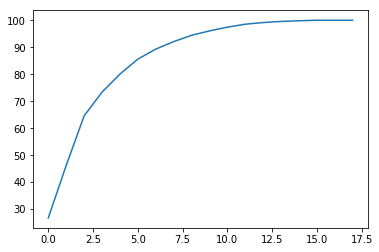

In [88]:
# PCA on data

pca = PCA(n_components=18)
pca_data = scale(data.iloc[:,1:20].values, axis=0)

pca.fit(pca_data)

var = pca.explained_variance_ratio_
#print(nmf.components_)

#Cumulative Variance explains
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

plt.plot(var1)
print(var1)


In [ ]:
knn2 = KNeighborsClassifier(n_neighbors = 3)
knn2.fit(x_train_pca, y_train)
knn2.score(x_test_pca, y_test)
knn2.predict(x_test_pca)

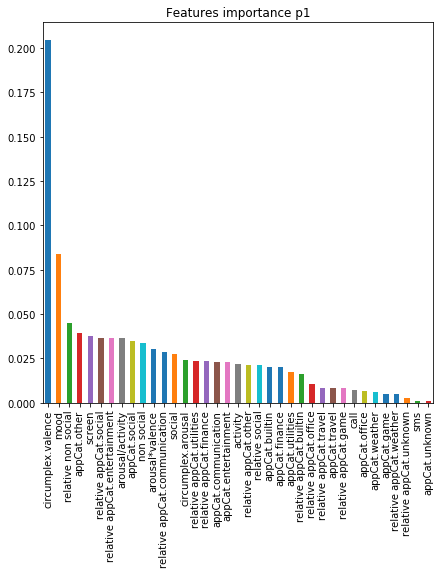

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


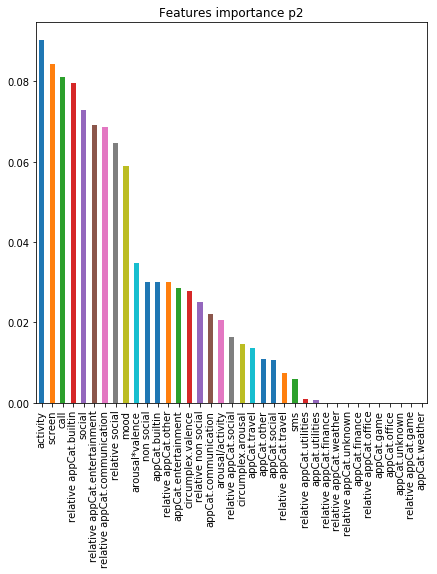

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


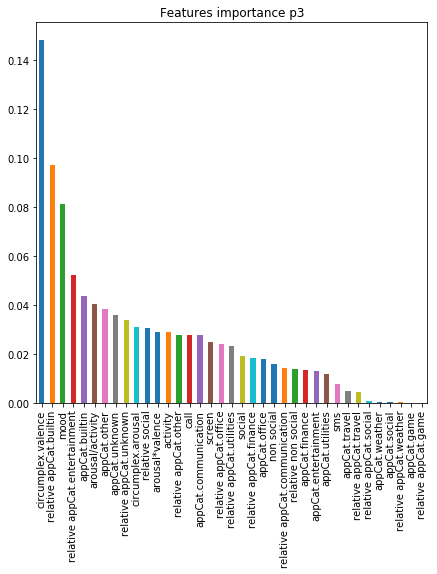

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


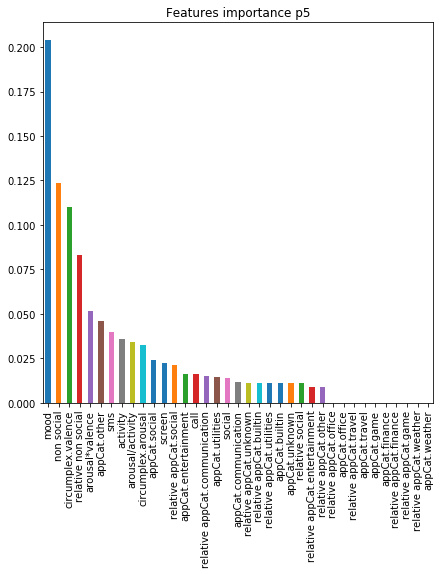

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


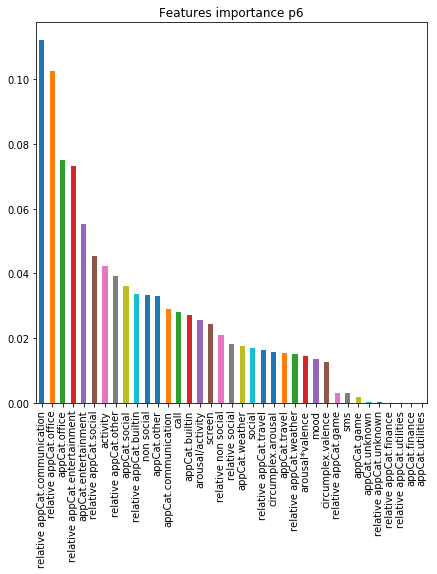

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


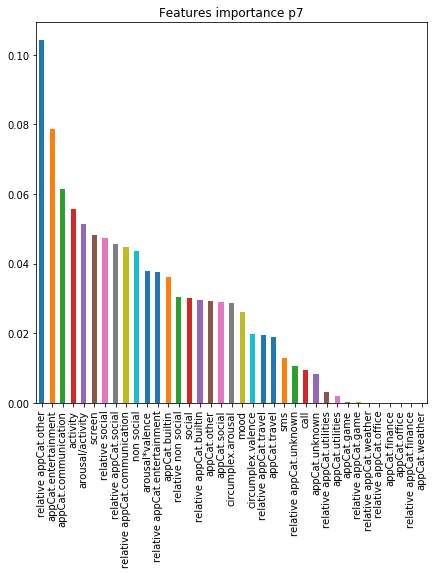

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


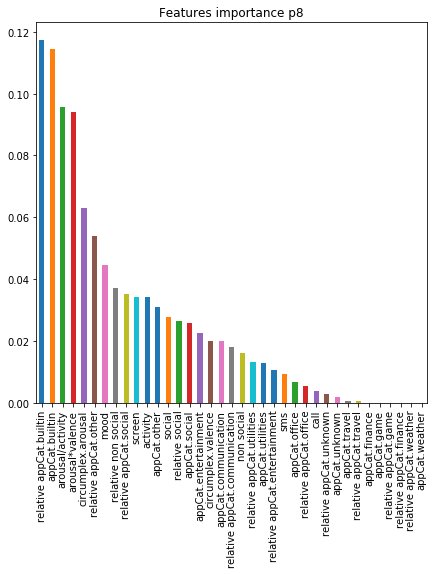

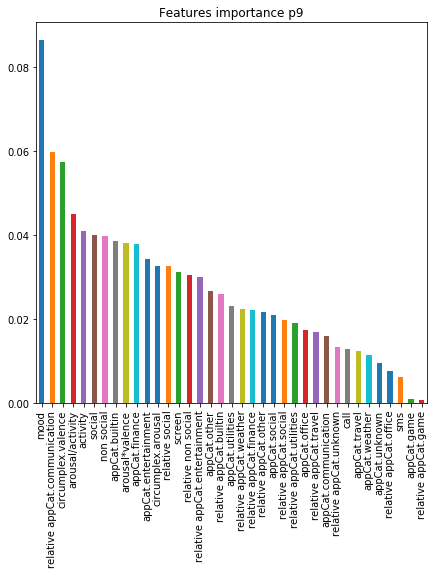

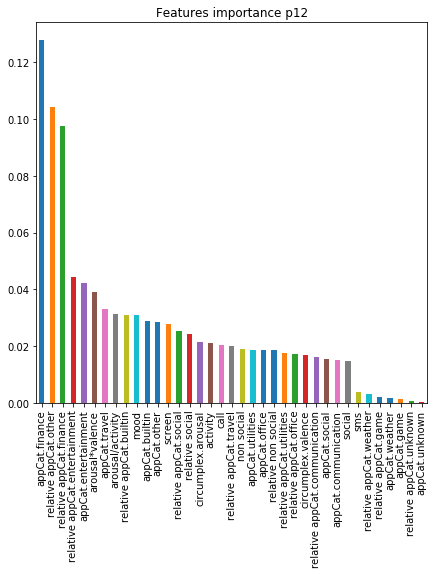

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


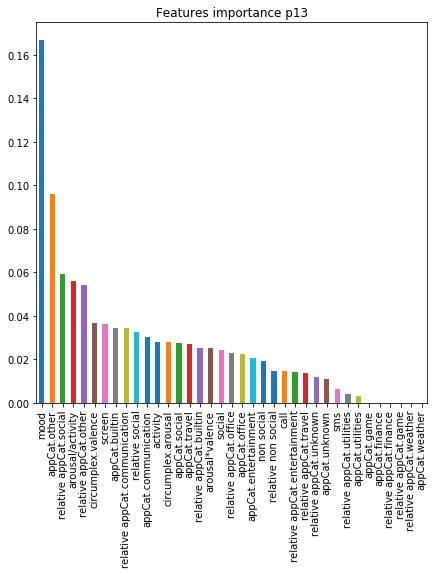

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


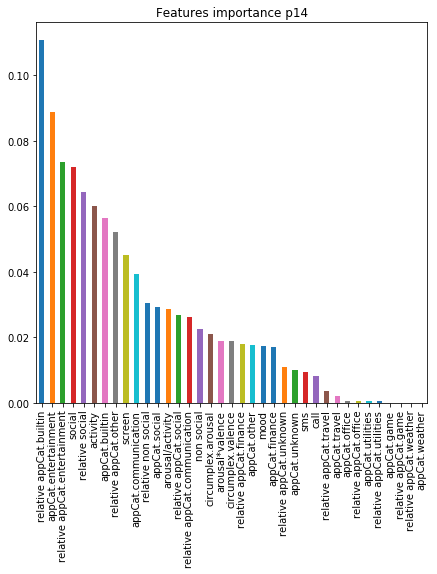

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


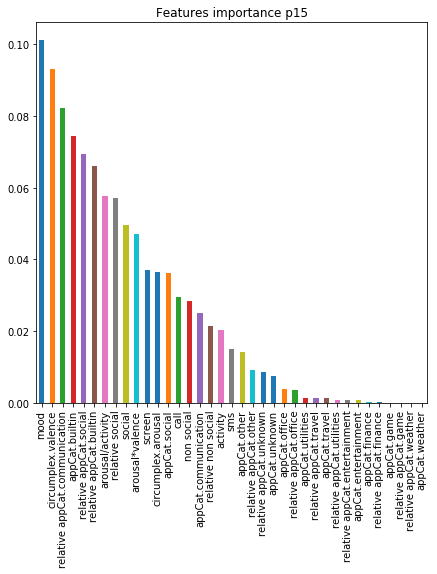

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


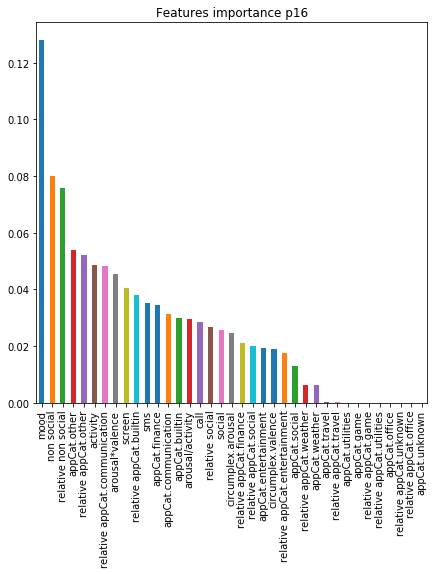

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


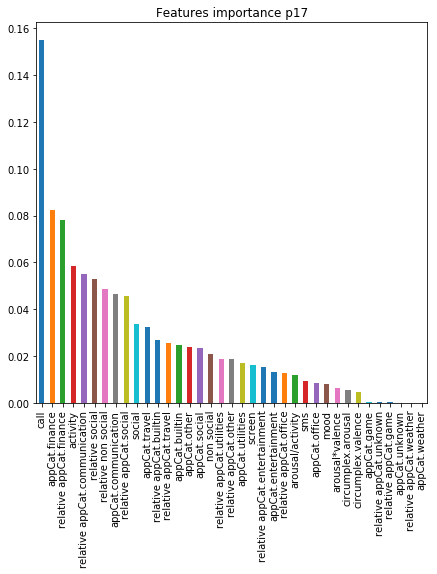

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


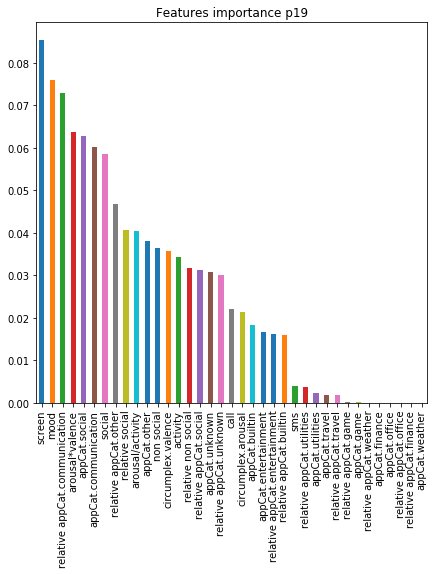

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


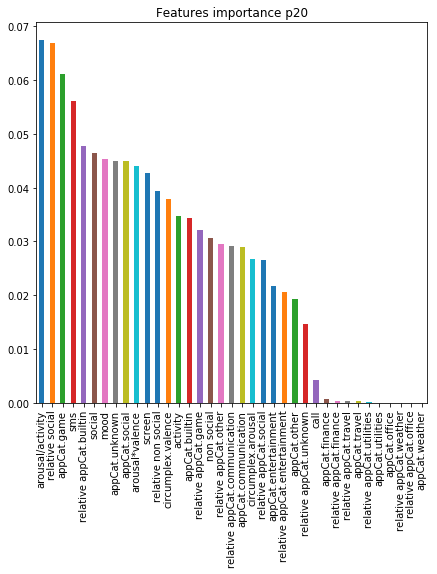

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


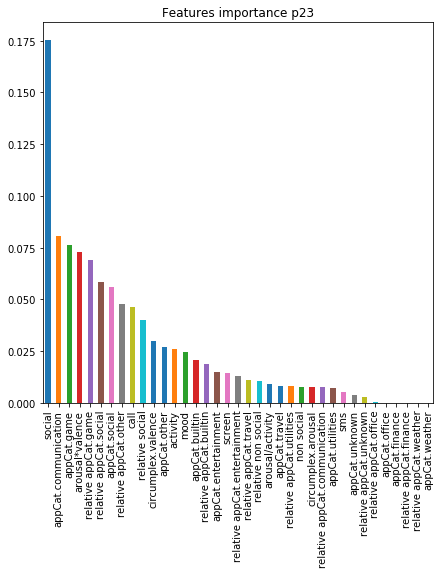

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


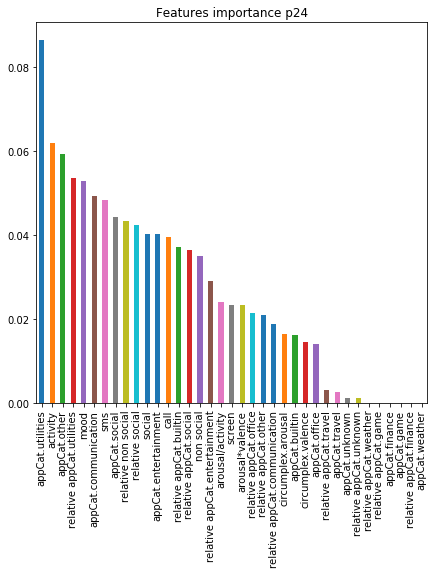

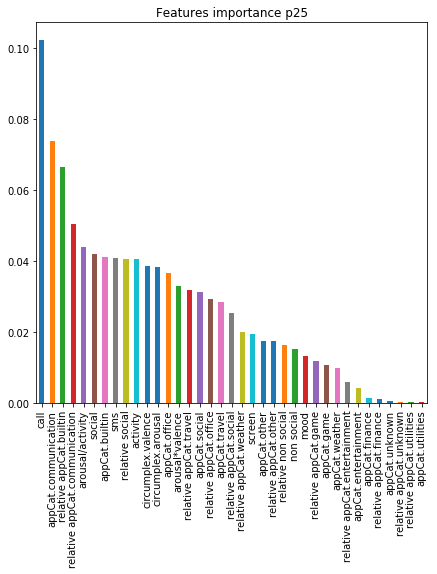

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


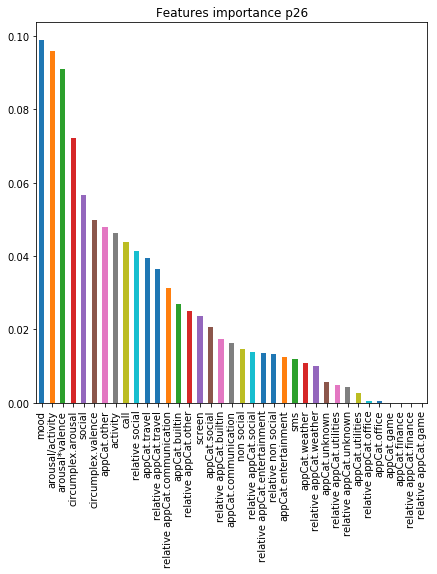

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


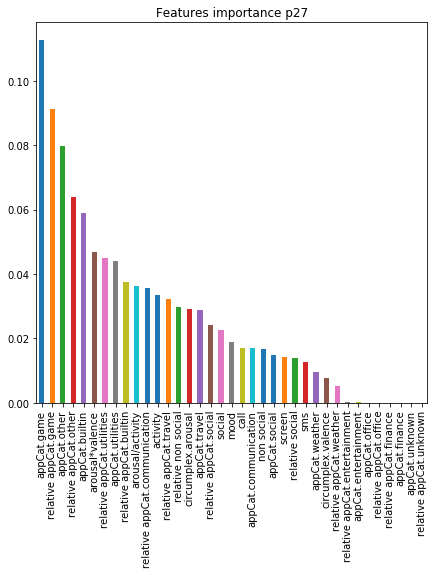

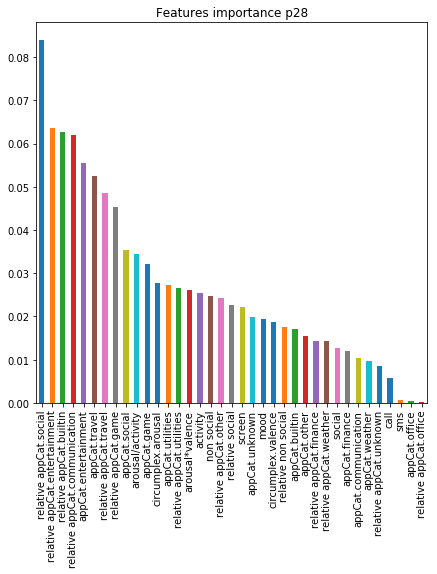

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


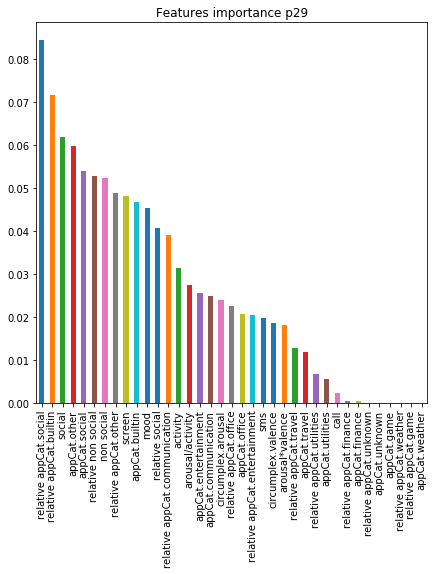

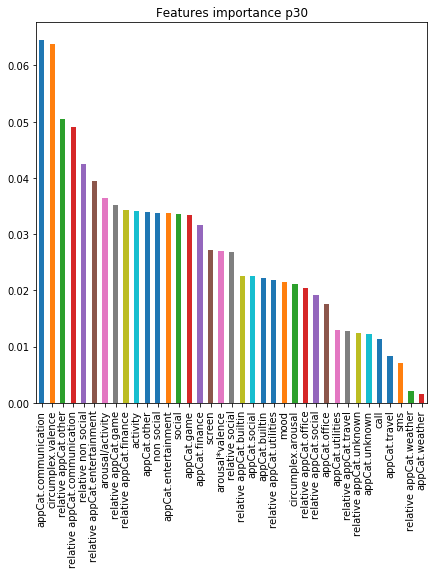

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


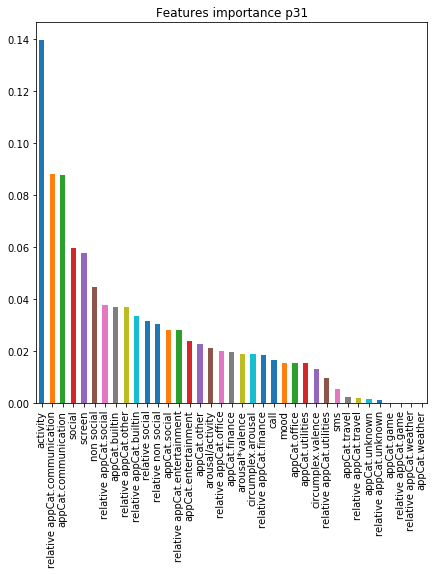

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


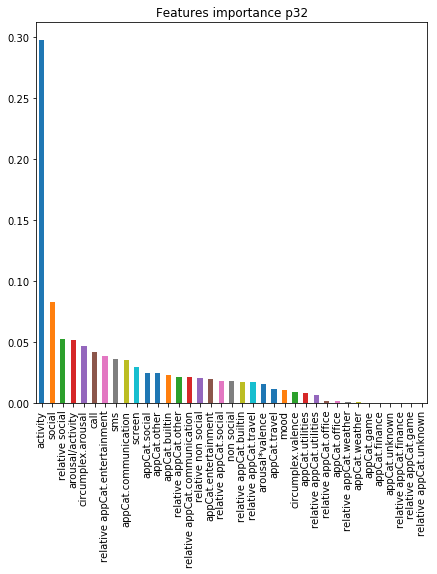

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


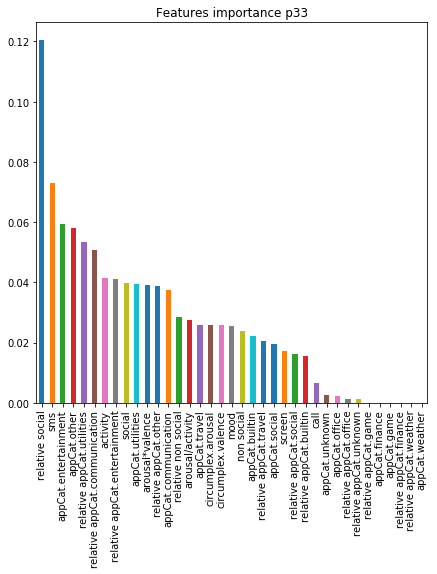

In [40]:
# RandomForestRegressor for Feature Importances

StandardScaler()       


x_labels  = np.array(['mood', 'circumplex.arousal', 'circumplex.valence', 'activity',
       'screen', 'call', 'sms', 'appCat.builtin', 'appCat.communication',
       'appCat.entertainment', 'appCat.finance', 'appCat.game',
       'appCat.office', 'appCat.other', 'appCat.social', 'appCat.travel',
       'appCat.unknown', 'appCat.utilities', 'appCat.weather', 'arousal/activity', 'social']) 
for i in [1,2,3,5,6,7,8,9,12,13,14,15,16,17,19,20,23,24,25,26,27,28,29,30,31,32,33]:
#for i in [1,2]:

    if i < 10:
        data = pd.read_csv('patient_0%s_summary.csv'%i)
        #locals()["x_p0"+str(i)] = data.iloc[:-1,2:]
        #locals()["y_p0"+str(i)] = data.iloc[1:,1]
        
    else:
        data = pd.read_csv('patient_%s_summary.csv'%i)
        #locals()["x_p"+str(i)] = data.iloc[:-1,:]
        #locals()["y_p"+str(i)] = data.iloc[1:,1]
    
   
    data['arousal/activity'] = data['circumplex.arousal']/(data['activity']+1)
    data['arousal*valence'] = (data['circumplex.arousal']+2)*data['circumplex.valence']
    data['social'] = scale(data['call'])+scale(data['sms'])+scale(data['appCat.communication'])+scale(data['appCat.social'])
    data['non social']  = scale(data['appCat.builtin']) + scale(data['appCat.entertainment'])+scale(data['appCat.finance'])+ scale(data['appCat.game'])+ scale(data['appCat.office']) + scale(data['appCat.other']) +scale(data['appCat.travel'])+scale(data['appCat.unknown']) + scale(data['appCat.utilities'])+scale(data['appCat.weather'])
    
    for category in  np.array(['appCat.builtin', 'appCat.communication',
       'appCat.entertainment', 'appCat.finance', 'appCat.game',
       'appCat.office', 'appCat.other', 'appCat.social', 'appCat.travel',
       'appCat.unknown', 'appCat.utilities', 'appCat.weather', 'social', 'non social']):
        
        data['relative '+category] = data[category]/(data['screen']+1)
    
    x_labels = np.array(data.columns[1:])
    x_p = data.iloc[:-1,1:]
    y_p = data.iloc[1:,1]
    clf = ske.RandomForestRegressor(n_estimators=1000, max_features=19)
    clf = clf.fit(x_p, y_p)
    
    fet_ind = np.argsort(clf.feature_importances_)[::-1]
    fet_imp = clf.feature_importances_[fet_ind]
    labels = x_labels[fet_ind]
    fig, ax = plt.subplots(figsize=[7,7])
    pd.Series(fet_imp, index=labels).plot('bar', ax=ax)
    ax.set_title('Features importance p%s'%i)
    plt.savefig('Feature Importance p%s'%i)
    plt.show()

In [135]:
# Example of a DecisionTreeRegressor and the image

clf = tree.DecisionTreeRegressor(criterion='mse')
clf = clf.fit(x_p1, y_p1)

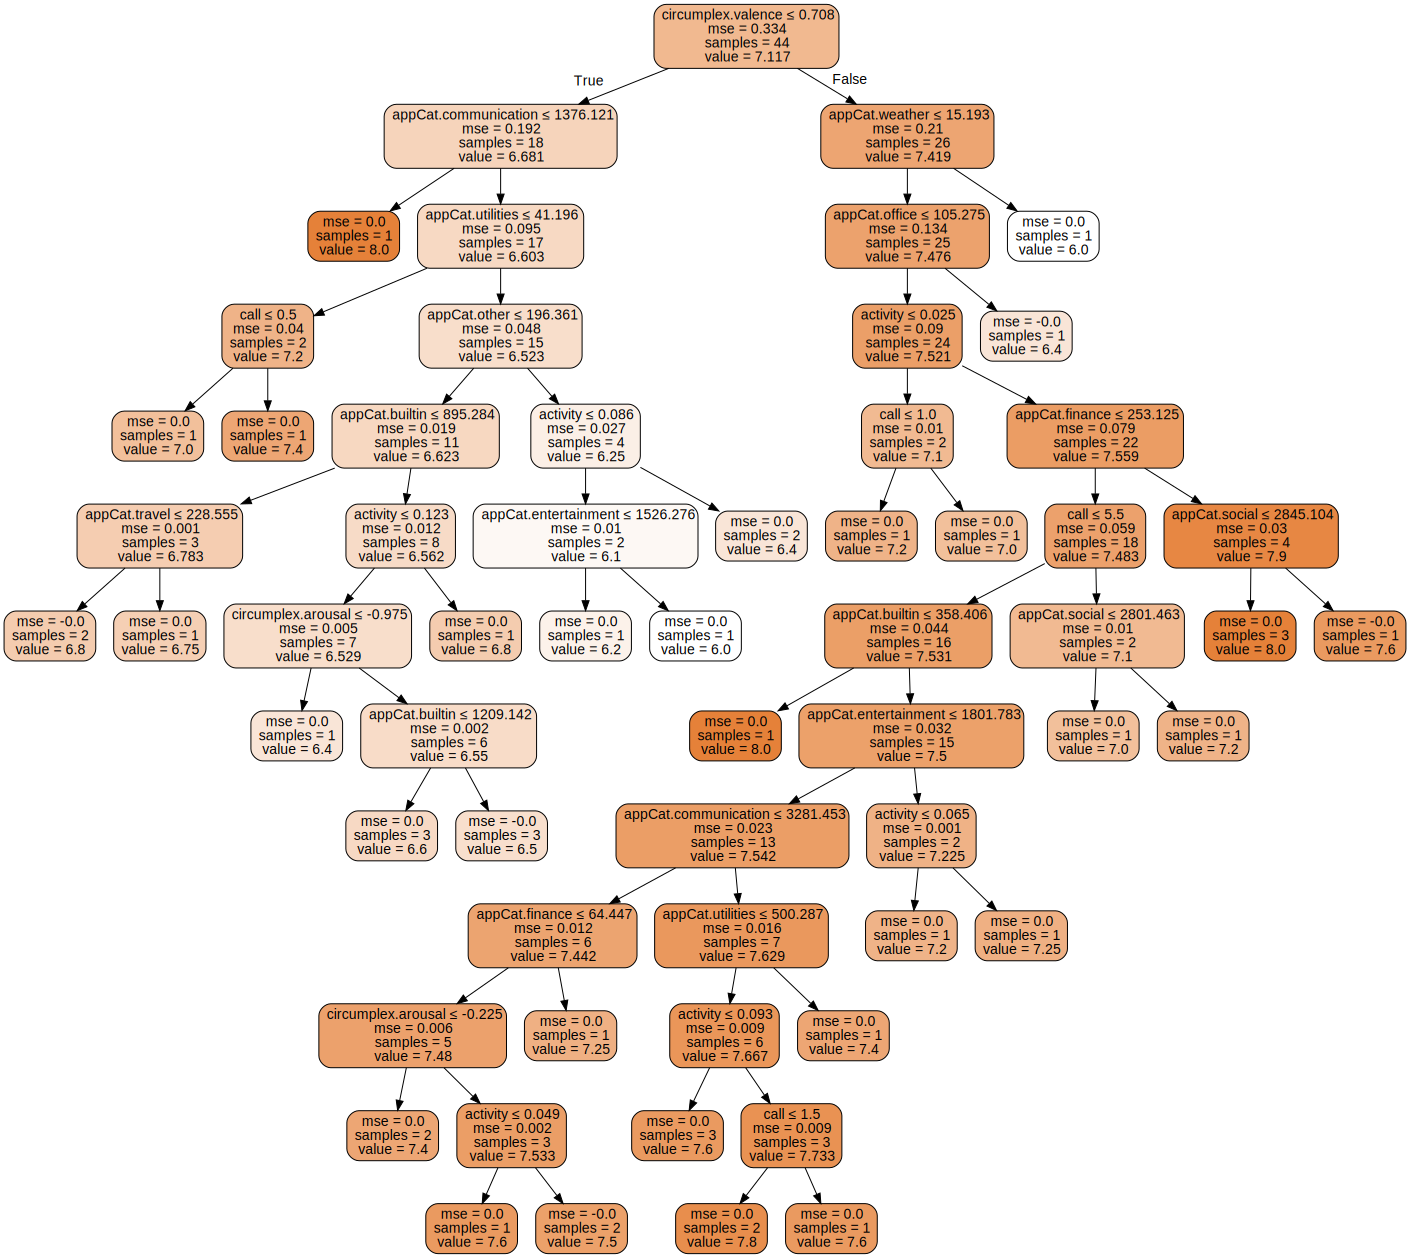

In [144]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                     feature_names=x_labels,    
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

In [63]:
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.arima_model import ARIMA

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  

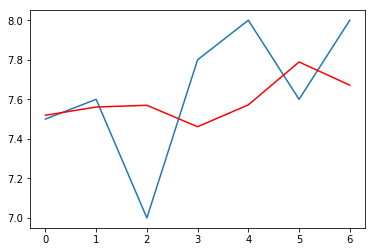

In [83]:
# Arima model, possible benchmark?
trainData = data1[0][:39].values
testData = data1[0][39:46].values

history = [x for x in trainData]
predictions = list()

for t in range(len(testData)):
    model = ARIMA(history, order=(2,1,2))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = testData[t]
    history.append(obs)
    
plt.plot(testData)
plt.plot(predictions, color='red')
plt.show()

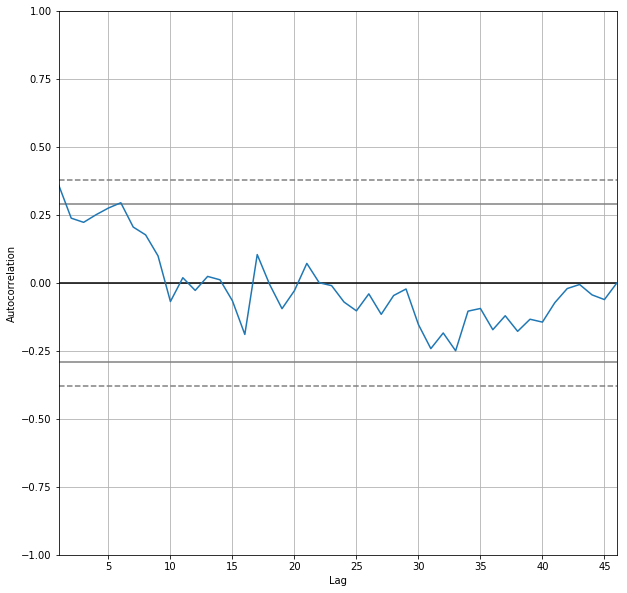

In [62]:
# Autocorrelation
moodp1 = data3[0][:46]
plt.figure(figsize=[10,10])
autocorrelation_plot(moodp1)